In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import math

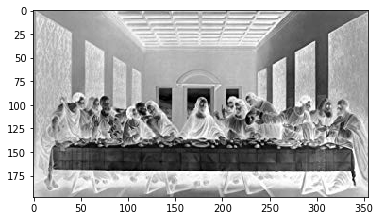

In [2]:
'''Invert image'''
img = cv2.imread("LastSupper.jpg",0)
imgInv = []
for i in img:
    row = []
    for j in i:
        j = 255-j 
        row.append(j)
    imgInv.append(row)
    
plt.imshow(imgInv,cmap ="gray")
plt.show()

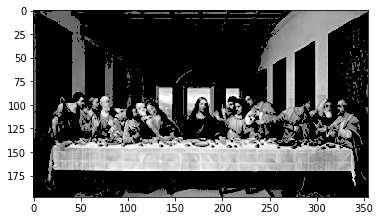

In [3]:
'''Thrashold'''
img = cv2.imread("LastSupper.jpg",0)

thresh = 100

imgInv = []
for i in img:
    row = []
    for j in i:
        if j <thresh:
            j = 0 
        row.append(j)
    imgInv.append(row)
    
plt.imshow(imgInv,cmap ="gray")
plt.show()

old high 202
old low 118
new high 255.0
new low 0.0


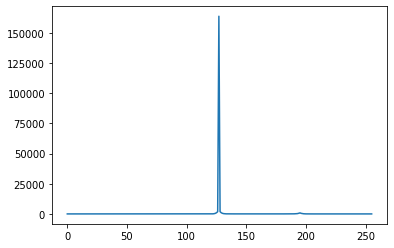

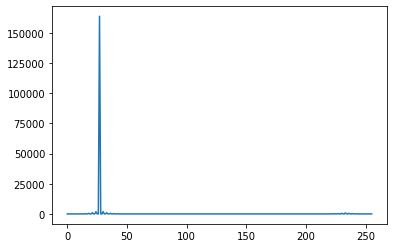

In [8]:
'''Automatic Contrast Adjustment'''
img = cv2.imread("Untitled.jpg",0)

hist_list = [0] * 256
x = []
#create list of image hist
for i in img:
    for j in i:
        hist_list[j] = hist_list[j]+1
#plot original hist
plt.figure()
plt.plot(hist_list)
#find max min value
imgInv = []
a_high=0
a_low=255
for i in img:
    for j in i:
        if j >= a_high:
            a_high = j
        if j<=a_low:
            a_low =j
print("old high "+str(a_high))
print("old low "+str(a_low))
#calculate new matrix
for i in img:
    row = []
    for j in i:
        j =  (j-a_low)*255/(a_high-a_low)
        row.append(j)
    imgInv.append(row)
#find new max min
a_high_new=0
a_low_new=255
for i in imgInv:
    for j in i:
        if j >= a_high_new:
            a_high_new = j
        if j<=a_low_new:
            a_low_new = j
print("new high "+str(a_high_new))
print("new low "+str(a_low_new))


hist_list = [0] * 256
x = []
#create list of image hist
for i in imgInv:
    for j in i:
        hist_list[math.floor(j)] = hist_list[math.floor(j)]+1
#plot original hist
plt.figure()
plt.plot(hist_list)

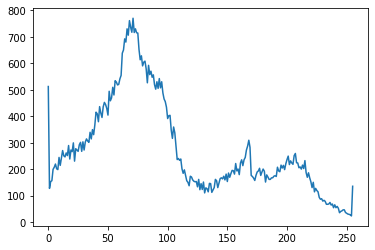

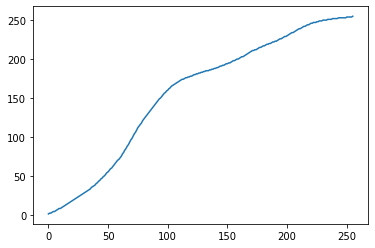

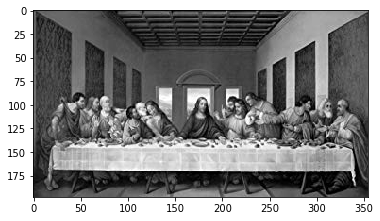

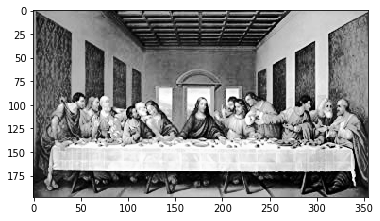

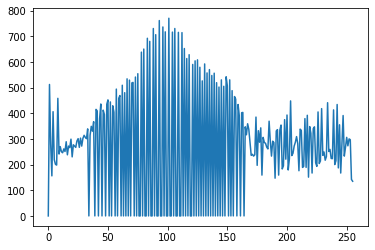

In [6]:
'''Histogram Equalization'''
img = cv2.imread("LastSupper.jpg",0)
hist_list = [0] * 256
x = []
#create list of image hist
for i in img:
    for j in i:
        hist_list[j] = hist_list[j]+1
#plot original hist
plt.figure()
plt.plot(hist_list)
#crate list of hist probability
hist_prob = []
hist_list_sum = sum(hist_list)
for i in hist_list:
    hist_prob.append(i/hist_list_sum)
#crate list of cummulative probability
hist_cum = []
hist_sum=0
for i in hist_prob:
    hist_sum = hist_sum+i
    hist_cum.append(hist_sum)
#crate list of new hist by mutiply list of cummulative probability with 255
new_hist=[]
for i in hist_cum:
    new_hist.append(math.floor(i*255))
#plot new hist
plt.figure()
plt.plot(new_hist)
#show image
new_img = []
for i in img:
    row=[]
    for j in i:
        row.append(new_hist[j])
    new_img.append(row)
plt.figure()
plt.imshow(img,cmap ="gray")
plt.figure()
plt.imshow(new_img,cmap ="gray")
plt.show()
#show new image hist
new_img_hist = [0] * 256
for i in new_img:
    for j in i:
        new_img_hist[j] = new_img_hist[j]+1
plt.figure()
plt.plot(new_img_hist)
